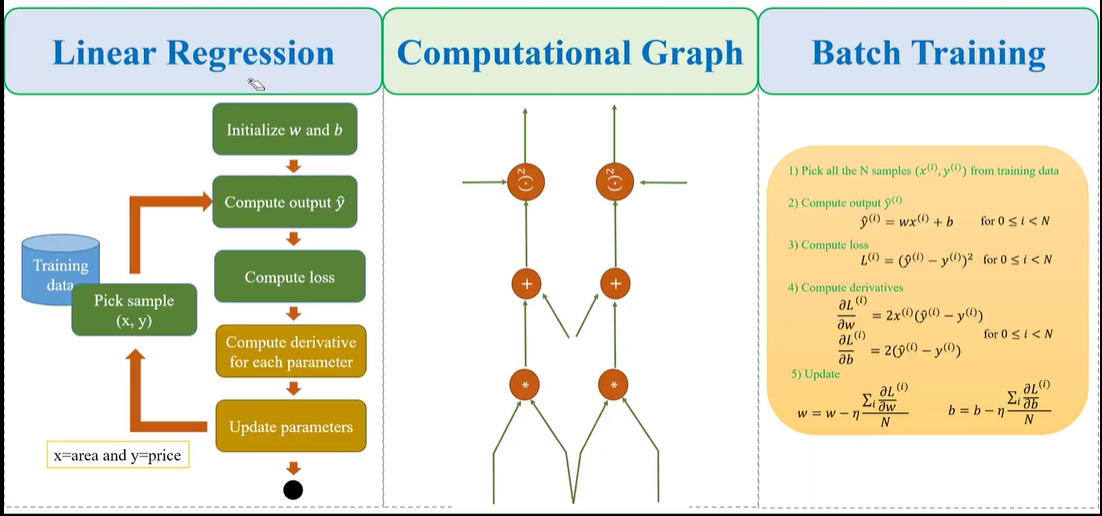

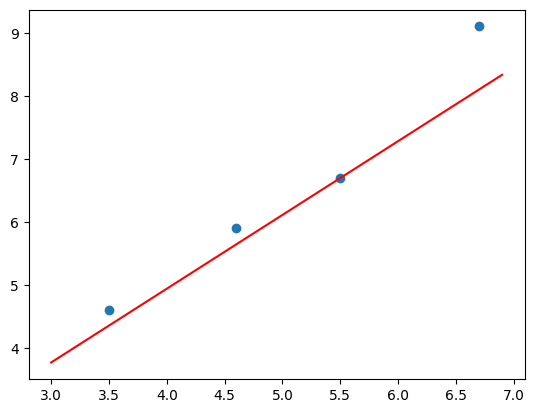

In [844]:
import matplotlib.pyplot as plt
import numpy as np

areas = [6.7, 4.6, 3.5, 5.5]
prices = [9.1, 5.9, 4.6, 6.7]

w = 1.17
b = 0.26

x_values = np.arange(3, 7, 0.1)
y_values = x_values*w + b

plt.scatter(areas, prices)
plt.plot(x_values, y_values, 'r')

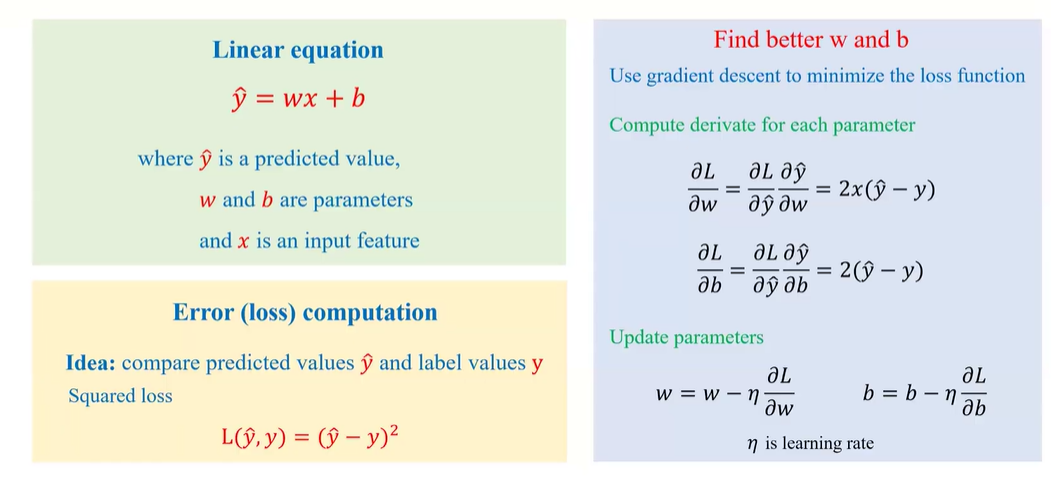

Area - Price Data

In [845]:
areas = [6.7, 4.6, 3.5, 5.5]
prices = [9.1, 5.9, 4.6, 6.7]
N = 4
num_epochs = 10

w = -0.34
b = 0.04
lr = 0.01

In [846]:
def predict(x, w, b):
    return w*x + b

def compute_loss(y_hat, y):
    return (y_hat - y)**2

def compute_gradient(x, y_hat, y):
    dl_dw = 2*x*(y_hat - y)
    dl_db = 2*(y_hat -y)
    return dl_dw, dl_db

def update_weights(w, b, dl_dw, dl_db, lr):
    new_w = w - dl_dw*lr
    new_b = b - dl_db*lr
    return new_w, new_b

In [847]:
losses = []
for _ in range(num_epochs):
    for i in range(N):

        #get a sample
        x = areas[i]
        y = prices[i]

        #compute predict
        y_hat = predict(x, w, b)

        #compute loss
        loss = compute_loss(y_hat, y)
        losses.append(loss)

        #compute gradient
        dl_dw, dl_db = compute_gradient(x, y_hat, y)

        #update weights
        w, b = update_weights(w, b, dl_dw, dl_db, lr)



In [848]:
len(losses)

40

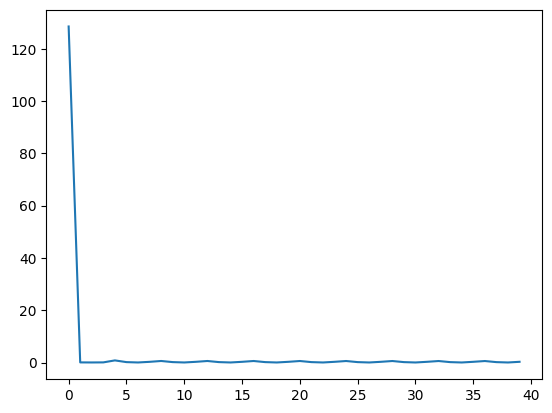

In [849]:
import matplotlib.pyplot as plt

plt.plot(losses)

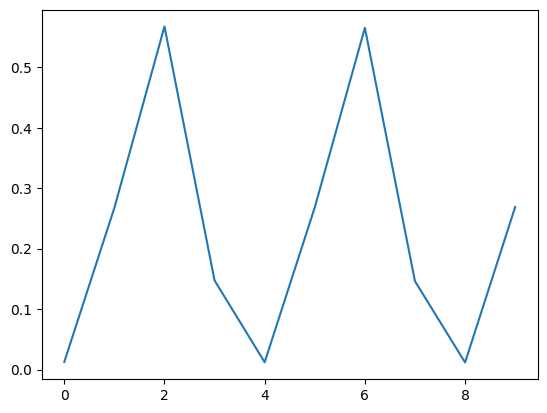

In [850]:
import matplotlib.pyplot as plt

plt.plot(losses[-10:])

In [851]:
areas = [6.7, 4.6, 3.5, 5.5]
prices = [9.1, 5.9, 4.6, 6.7]

In [852]:
epoch = 100
m = 2
N = 4

In [853]:
w = -0.34
b = 0.04
lr = 0.01

In [854]:
def predict(x, w, b):
    return w*x + b

def compute_loss(y_hat, y):
    return (y_hat - y)**2

def compute_gradient(x, y_hat, y):
    dl_dw = 2*x*(y_hat - y)
    dl_db = 2*(y_hat -y)
    return dl_dw, dl_db

def update_weights(w, b, dl_dw, dl_db, lr):
    new_w = w - dl_dw*lr
    new_b = b - dl_db*lr
    return new_w, new_b

In [855]:
losses = []
for _ in range(epoch):

    #for each epoch
    for i in range(0, N, m):

        #for each mini-batch
        acc_loss = 0
        acc_dl_dw = 0
        acc_dl_db = 0
        for j in range(m):

           #get a sample
           x = areas[i + j]
           y = prices[i + j]

           #compute predict
           y_hat = predict(x, w, b)

           #compute loss
           loss = compute_loss(y_hat, y)
           acc_loss = acc_loss + loss

           #compute gradient
           dl_dw, dl_db = compute_gradient(x, y_hat, y)
           acc_dl_dw = acc_dl_dw + dl_dw
           acc_dl_db = acc_dl_db + dl_db

        #compute average
        avg_loss = acc_loss/m
        losses.append(avg_loss)
        avg_dl_dw = acc_dl_dw/m
        avg_dl_db = acc_dl_db/m
        
        #update weights
        w, b = update_weights(w, b, avg_dl_dw, avg_dl_db, lr)

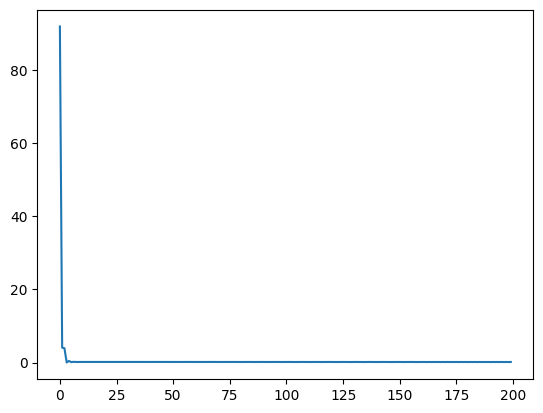

In [856]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [857]:
w, b

(1.2560001045913396, 0.15874027108213903)

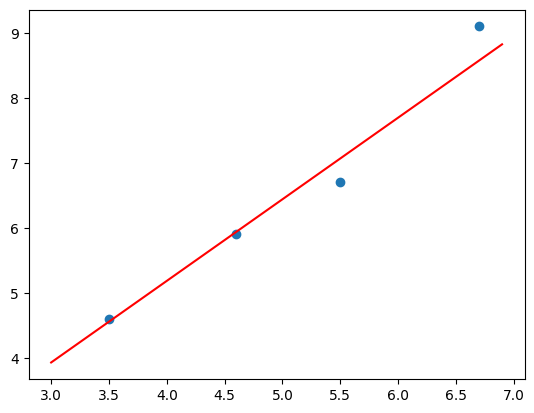

In [858]:
import matplotlib.pyplot as plt
import numpy as np
import random

areas = [6.7, 4.6, 3.5, 5.5]
prices = [9.1, 5.9, 4.6, 6.7]

x_values = np.arange(3, 7, 0.1)
y_values = x_values*w + b

plt.scatter(areas, prices)
plt.plot(x_values, y_values, 'r')

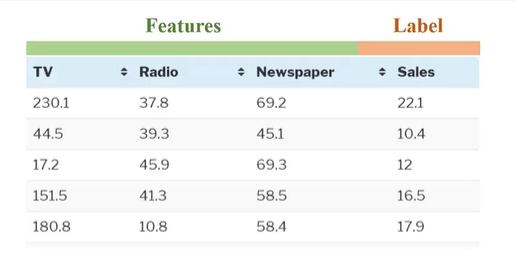

In [859]:
Tivi = [230.1, 44.5, 17.2, 151.5,180.8]
Radio = [37.8, 39.3, 45.9, 41.3, 10.8]
Newspaper = [69.2, 45.1, 69.3, 58.5, 58.4]
Label = [22.1, 10.4, 12, 16.5, 17.9]

In [860]:
def predict(w1, x1, w2, x2, w3, x3, b):
    return w1*x1 + w2*x2 + w3*x3

def compute_loss(y_hat, y):
    return (y_hat - y)**2

def compute_gradient(x1, x2, x3, y_hat, y):
    dl_dw1 = 2*x1*(y_hat - y)
    dl_dw2 = 2*x2*(y_hat - y)
    dl_dw3 = 2*x3*(y_hat - y)
    dl_db = 2*(y_hat - y)
    return dl_dw1, dl_dw2, dl_dw3, dl_db

def update_weights(w1, w2, w3, b, dl_dw1, dl_dw2, dl_dw3, dl_db, lr):
    new_w1 = w1 - dl_dw1*lr
    new_w2 = w2 - dl_dw2*lr
    new_w3 = w3 - dl_dw3*lr
    new_b = b - dl_db*lr
    return new_w1, new_w2, new_w3, new_b

In [861]:
def init_params():
    w1 = random.gauss(mu = 0, sigma=0.01)
    w2 = random.gauss(mu = 0, sigma=0.01)
    w3 = random.gauss(mu = 0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

In [862]:
w1, w2, w3, b = init_params()
w1, w2, w3, b

(0.009016073520422715, 0.0007604580807606587, -0.018373589705551373, 0)

In [863]:
lr = 0.0000095
epoch = 100
N = 5
m = 2

In [864]:
losses = []
for _ in range(epoch):

    #for each epoch
    for i in range(0, N, m):
        batch_size = min(m, N-i)
        acc_loss = 0
        acc_dl_dw1 = 0
        acc_dl_dw2 = 0
        acc_dl_dw3 = 0
        acc_dl_db = 0
        #for each mini-batch
        for j in range(batch_size):

           #get a sample
           x1 = Tivi[i+j]
           x2 = Radio[i+j]
           x3 = Newspaper[i+j]
           y = Label[i+j]
           
           #get predict
           y_hat = predict(w1, x1, w2, x2, w3, x3, b)

           #compute loss
           loss = compute_loss(y_hat, y)
           acc_loss = acc_loss + loss

           #compute gradient
           dl_dw1, dl_dw2, dl_dw3, dl_db = compute_gradient(x1, x2, x3, y_hat, y)
           acc_dl_dw1 = acc_dl_dw1 + dl_dw1
           acc_dl_dw2 = acc_dl_dw2 + dl_dw2
           acc_dl_dw3 = acc_dl_dw3 + dl_dw3
           acc_dl_db = acc_dl_db + dl_db
        
        #compute average
        avg_loss = acc_loss/batch_size
        losses.append(avg_loss)
        avg_dl_dw1 = acc_dl_dw1/batch_size
        avg_dl_dw2 = acc_dl_dw2/batch_size
        avg_dl_dw3 = acc_dl_dw3/batch_size
        avg_dl_db = acc_dl_db/batch_size
        
        #update weights
        w1, w2, w3, b = update_weights(w1, w2, w3, b, avg_dl_dw1, avg_dl_dw2, avg_dl_dw3, avg_dl_db, lr)

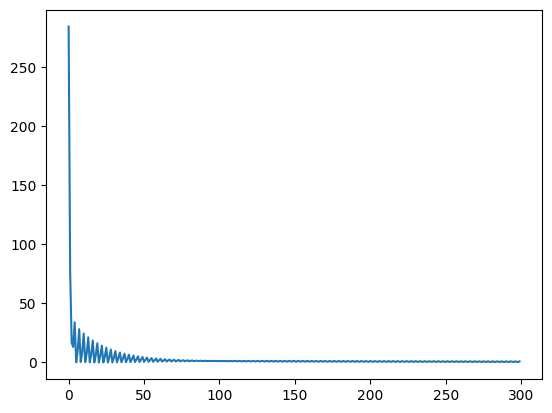

In [865]:
import matplotlib.pyplot as plt

plt.plot(losses)